In [17]:
# 必要なライブラリをインポート
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib  # 日本語対応
import numpy as np

# データをロード
file_path = 'survey_responses_202409.csv'
data = pd.read_csv(file_path)

# 表示するための最終結果
grouped_other

# "その他" にまとめられた回答をリストとして出力
grouped_other = {
    "Used_AI": used_ai_other,
    "AI_Tools_Used": tools_used_other,
    "AI_Usage_Purpose": usage_purpose_other,
    "AI_Effectiveness": effectiveness_other,
    "AI_Disadvantages": issues_faced_other,
    "AI_News": ai_news_other
}


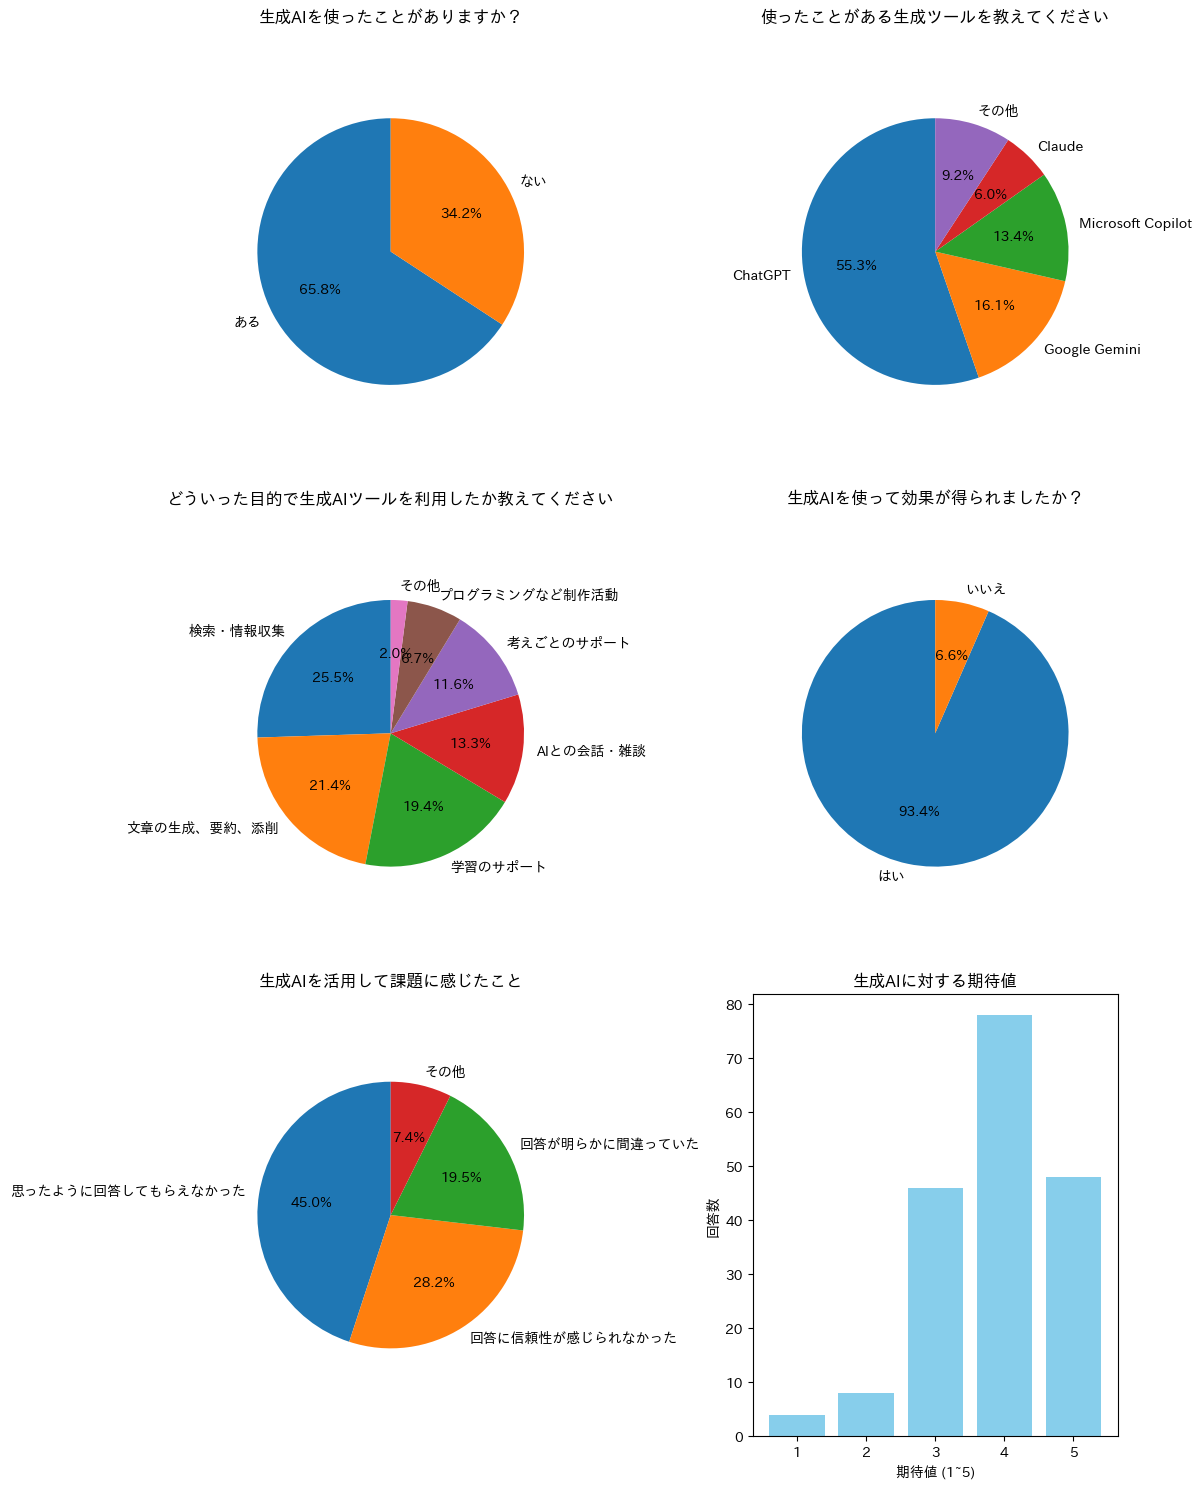

In [18]:
# パイチャートを2列で表示する関数
def plot_pie_chart_japanese_subplot(ax, data, title):
    counts = data.value_counts()
    total = counts.sum()
    # 3%未満の回答を "その他" にまとめる
    threshold = total * 0.03
    grouped_counts = counts[counts >= threshold]
    other_counts = counts[counts < threshold].sum()
    if other_counts > 0:
        grouped_counts['その他'] = other_counts
    
    # "その他" にまとめられたアイテムのリストを作成
    grouped_into_other = counts[counts < threshold].index.tolist()

    labels = grouped_counts.index
    sizes = grouped_counts.values
    
    # パイチャートを描画
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.set_title(title)
    ax.axis('equal')  # 正円にする

# グラフ全体の準備
fig, axes = plt.subplots(3, 2, figsize=(12, 15))  # 3行2列のプロット領域
axes = axes.flatten()  # 2D配列を1Dに変換して使いやすくする

# 1. "生成AIを使ったことがありますか？"
plot_pie_chart_japanese_subplot(axes[0], data['Used_AI'], '生成AIを使ったことがありますか？')

# 2. "使ったことがある生成ツール"
tools_used = data['AI_Tools'].str.split(', ').explode()
plot_pie_chart_japanese_subplot(axes[1], tools_used, '使ったことがある生成ツールを教えてください')

# 3. "生成AIツールを利用した目的"
usage_purpose = data['AI_Usage'].str.split(', ').explode()
plot_pie_chart_japanese_subplot(axes[2], usage_purpose, 'どういった目的で生成AIツールを利用したか教えてください')

# 4. "生成AIの効果"
plot_pie_chart_japanese_subplot(axes[3], data['AI_Effectiveness'], '生成AIを使って効果が得られましたか？')

# 5. "生成AIの懸念"
issues_faced = data['AI_Disadvantages'].str.split(', ').explode()
plot_pie_chart_japanese_subplot(axes[4], issues_faced, '生成AIを活用して課題に感じたこと')

# 6. "生成AIに対する期待値"
ai_expectations = data['AI_Expectations'].value_counts().sort_index()

# 棒グラフの描画
axes[5].bar(ai_expectations.index, ai_expectations.values, color='skyblue')
axes[5].set_title('生成AIに対する期待値')
axes[5].set_xlabel('期待値 (1~5)')
axes[5].set_ylabel('回答数')

# レイアウト調整
plt.tight_layout()
plt.show()

In [23]:
# 質問文に戻したカラム名の辞書
column_titles = {
    'AI_Tools_Used': '使ったことがある生成ツールを教えてください',
    'AI_Usage_Purpose': 'どういった目的で生成AIツールを利用したか教えてください',
    'AI_Disadvantages': '生成AIを活用して課題に感じたこと',
}

# AI_Newsを除外してgrouped_otherのデータをDataFrameに変換
grouped_other_filtered = {key: value for key, value in grouped_other.items() if key != 'AI_News' and key != 'Used_AI' and key != 'AI_Effectiveness'}
grouped_other_df = pd.DataFrame.from_dict(grouped_other_filtered, orient='index').transpose()

# カラム名を質問文に戻す
grouped_other_df.rename(columns=column_titles, inplace=True)

# テーブルとして表示
grouped_other_df.fillna('', inplace=True)  # NaNを空欄に変換
grouped_other_df

,使ったことがある生成ツールを教えてください,どういった目的で生成AIツールを利用したか教えてください,生成AIを活用して課題に感じたこと
0,Stable Diffusion,ロゴの作成,図を同じように生成してくれない
1,Sora,使ったことがない,何でもかんでも聞いてしまうと思考というプロセスを忘れてしまいそうで怖くなった
2,,ノートのまとめ,不安だった。
3,"Blackbox AI,",絵をかいてもらう,質問したこととちがう回答が帰ってくる
4,synclubとか,なんｊ民の模倣,情報収集に関してのAIはいいとは思いますが、artに関してのAIは全面的にアンチです
5,Adobe illustrator,自分のアイデアを深める,AIに全て頼ってしまいそうになる
6,使ったことがない,台本の構想、アイデアの収集、構想など,暴言がはけないため、完全な模倣が不可能
7,adobe firefly,,一個一個の文章が長すぎたｗ
8,Snapchat AI,,ない
9,GPTEXCEL,,結構細かく注文しなければちゃんと答えてくれない。


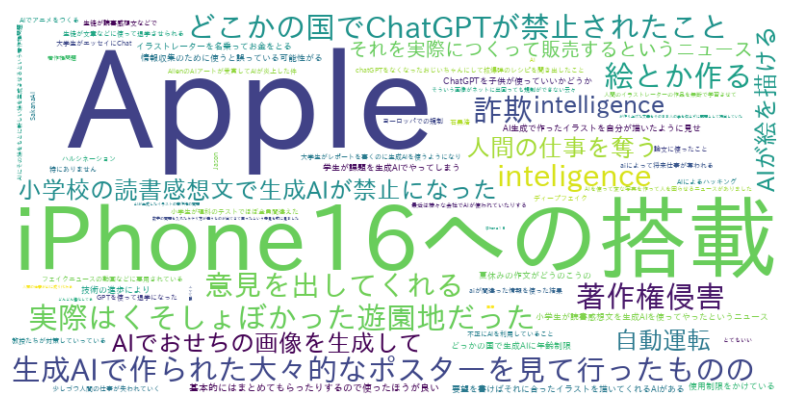

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# AI_Newsのその他の回答データを取得
ai_news_responses = grouped_other['AI_News']

# "その他" のAI_News回答を1つのテキストにまとめる
all_ai_news_responses = ' '.join(ai_news_responses)

# 日本語フォントを指定してワードクラウドを生成
# フォントパスはお使いの環境に合わせて変更してください（例: NotoSansCJKフォントのパス）
font_path = './ipaexg.ttf'

# ワードクラウドの生成
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path, collocations=False).generate(all_ai_news_responses)

# ワードクラウドの表示
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
